In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(84)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[1])
print("Label: {} which is {}".format(y_train[1],"postitive" if y_train[1] else "Negetive"))

[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2, 2, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 2, 2, 398, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 775, 7, 2, 2, 349, 2, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 2, 98, 5, 4, 228, 9, 43, 2, 2, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 2, 228, 2, 5, 2, 656, 245, 2, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 2, 14, 9, 6, 371, 78, 22, 625, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Label: 0 which is Negetive


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [6]:

from keras.layers import Dense, Dropout, Activation, PReLU

model = Sequential()
model.add(Dense(512, activation = "relu",input_shape=(1000,)))
# model.add(PReLU())
model.add(Dropout(0.3))
#model.add(Dense(128))
#model.add(PReLU())
#model.add(Dropout(0.25))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# TODO: Compile the model using a loss function and an optimizer.

W1114 18:12:30.777192  7124 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:518: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1114 18:12:30.784188  7124 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1114 18:12:30.816167  7124 deprecation_wrapper.py:119] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:134: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1114 18:12:30.838157  7124 deprecation.py:506] From C:\Users\Sarwar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3446: calling dropout (from tensorf

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________


In [8]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
#len(y_train)
history = model.fit(x_train, y_train,validation_split=0.33 ,epochs=25, batch_size=200, verbose=2)

Train on 16750 samples, validate on 8250 samples
Epoch 1/25
 - 4s - loss: 0.0018 - acc: 0.9999 - val_loss: 0.5860 - val_acc: 0.8585
Epoch 2/25
 - 4s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.5706 - val_acc: 0.8577
Epoch 3/25
 - 3s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.5961 - val_acc: 0.8573
Epoch 4/25
 - 4s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6034 - val_acc: 0.8575
Epoch 5/25
 - 5s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6108 - val_acc: 0.8568
Epoch 6/25
 - 5s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6110 - val_acc: 0.8581
Epoch 7/25
 - 5s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6199 - val_acc: 0.8572
Epoch 8/25
 - 5s - loss: 9.2882e-04 - acc: 1.0000 - val_loss: 0.6229 - val_acc: 0.8590
Epoch 9/25
 - 4s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6147 - val_acc: 0.8584
Epoch 10/25
 - 4s - loss: 0.0013 - acc: 0.9998 - val_loss: 0.6019 - val_acc: 0.8552
Epoch 11/25
 - 4s - loss: 0.0011 - acc: 0.9999 - val_loss: 0.6393 - val_acc: 0.8567
Epoch 12/25
 - 3s - loss: 0.0010

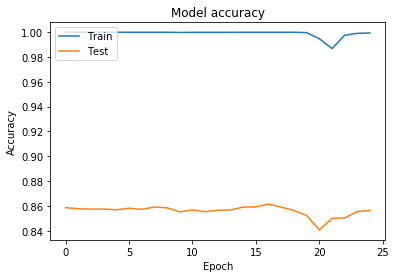

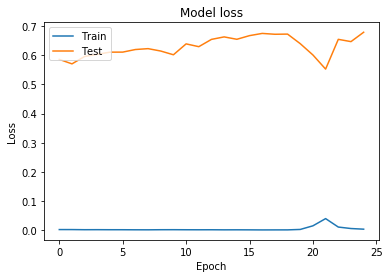

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.84948
